In [1]:
pip install opendatasets --upgrade --quiet

In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/rashikrahmanpritom/177k-english-song-data-from-20082017")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: anshalsingh
Your Kaggle Key: ··········


100%|██████████| 599k/599k [00:00<00:00, 69.6MB/s]

In [10]:
from google.colab import files
file=files.upload()

Saving metrics.json to metrics.json


In [4]:
import pandas as pd

In [13]:
data_songs=pd.read_csv("./177k-english-song-data-from-20082017/songs.csv",na_values=" ")
data_metrics=pd.read_csv("./metrics.csv")

In [14]:
data_metrics

,Unnamed: 0,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
4,4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072
...,...,...,...,...,...,...,...,...,...,...
13124,13124,124857,0.007592,0.790364,0.719288,0.853114,0.720715,0.082550,141.332,0.890461
13125,13125,124862,0.041498,0.843077,0.536496,0.865151,0.547949,0.074001,101.975,0.476845
13126,13126,124863,0.000124,0.609686,0.895136,0.846624,0.632903,0.051517,129.996,0.496667
13127,13127,124864,0.327576,0.574426,0.548327,0.452867,0.075928,0.033388,142.009,0.569274


In [8]:
data_songs

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,genres_all,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]","[58, 12, 45]",NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]","[58, 12, 45]",NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],"[25, 12]",NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],"[25, 12]",NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],"[26, 12]",NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17729,155063,320000,0,NaN,2017-03-24 19:40:43,NaN,283,3,Hip-Hop,"[21, 811]","[811, 21]",NaN,1283,NaN,Attribution,1050,NaN,4,NaN,"['old school beats', '2017 free instrumentals'...",Been On
17730,155064,320000,0,NaN,2017-03-24 19:40:44,NaN,250,2,Hip-Hop,"[21, 811]","[811, 21]",NaN,1077,NaN,Attribution,858,NaN,2,NaN,"['old school beats', '2017 free instrumentals'...",Send Me
17731,155065,320000,0,NaN,2017-03-24 19:40:45,NaN,219,3,Hip-Hop,"[21, 811]","[811, 21]",NaN,1340,NaN,Attribution,1142,NaN,1,NaN,"['old school beats', '2017 free instrumentals'...",The Question
17732,155066,320000,0,NaN,2017-03-24 19:40:47,NaN,252,6,Hip-Hop,"[21, 811]","[811, 21]",NaN,2065,NaN,Attribution,1474,NaN,3,NaN,"['old school beats', '2017 free instrumentals'...",Roy


In [16]:
print(type(data_metrics),type(data_songs))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [15]:
#Joining the data_tracks and metrics
dat_m1=data_metrics.copy()

In [18]:
new_df=pd.merge(data_metrics,data_songs[['track_id','genre_top']],on='track_id')

In [20]:
new_df=new_df.drop(columns=['Unnamed: 0'])

In [21]:
new_df

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
0,2,0.416675,0.675894,0.634476,1.062807e-02,0.177647,0.159310,165.922,0.576661,Hip-Hop
1,3,0.374408,0.528643,0.817461,1.851103e-03,0.105880,0.461818,126.957,0.269240,Hip-Hop
2,5,0.043567,0.745566,0.701470,6.967990e-04,0.373143,0.124595,100.260,0.621661,Hip-Hop
3,134,0.452217,0.513238,0.560410,1.944269e-02,0.096567,0.525519,114.290,0.894072,Hip-Hop
4,153,0.988306,0.255661,0.979774,9.730057e-01,0.121342,0.051740,90.241,0.034018,Rock
...,...,...,...,...,...,...,...,...,...,...
4797,124718,0.412194,0.686825,0.849309,6.000000e-10,0.867543,0.367315,96.104,0.692414,Hip-Hop
4798,124719,0.054973,0.617535,0.728567,7.215700e-06,0.131438,0.243130,96.262,0.399720,Hip-Hop
4799,124720,0.010478,0.652483,0.657498,7.098000e-07,0.701523,0.229174,94.885,0.432240,Hip-Hop
4800,124721,0.067906,0.432421,0.764508,1.625500e-06,0.104412,0.310553,171.329,0.580087,Hip-Hop


In [22]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4801
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   acousticness      4802 non-null   float64
 2   danceability      4802 non-null   float64
 3   energy            4802 non-null   float64
 4   instrumentalness  4802 non-null   float64
 5   liveness          4802 non-null   float64
 6   speechiness       4802 non-null   float64
 7   tempo             4802 non-null   float64
 8   valence           4802 non-null   float64
 9   genre_top         4802 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 412.7+ KB


In [23]:
new_df.genre_top.value_counts()

Rock       3892
Hip-Hop     910
Name: genre_top, dtype: int64

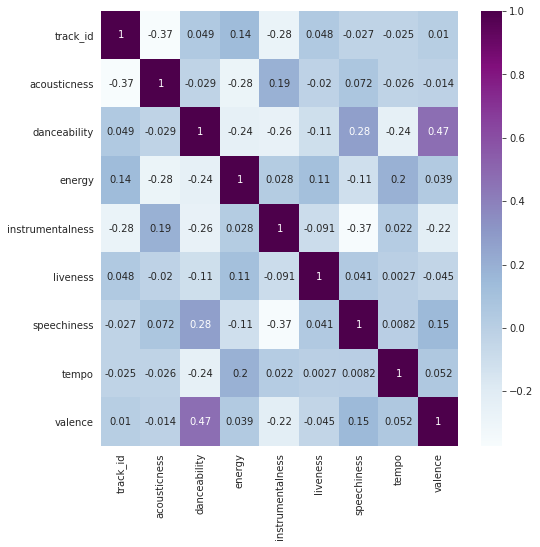

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")
plt.figure(figsize=(8,8))
sns.heatmap(new_df.corr(),cmap='BuPu',annot=True,cbar=True)
plt.show()

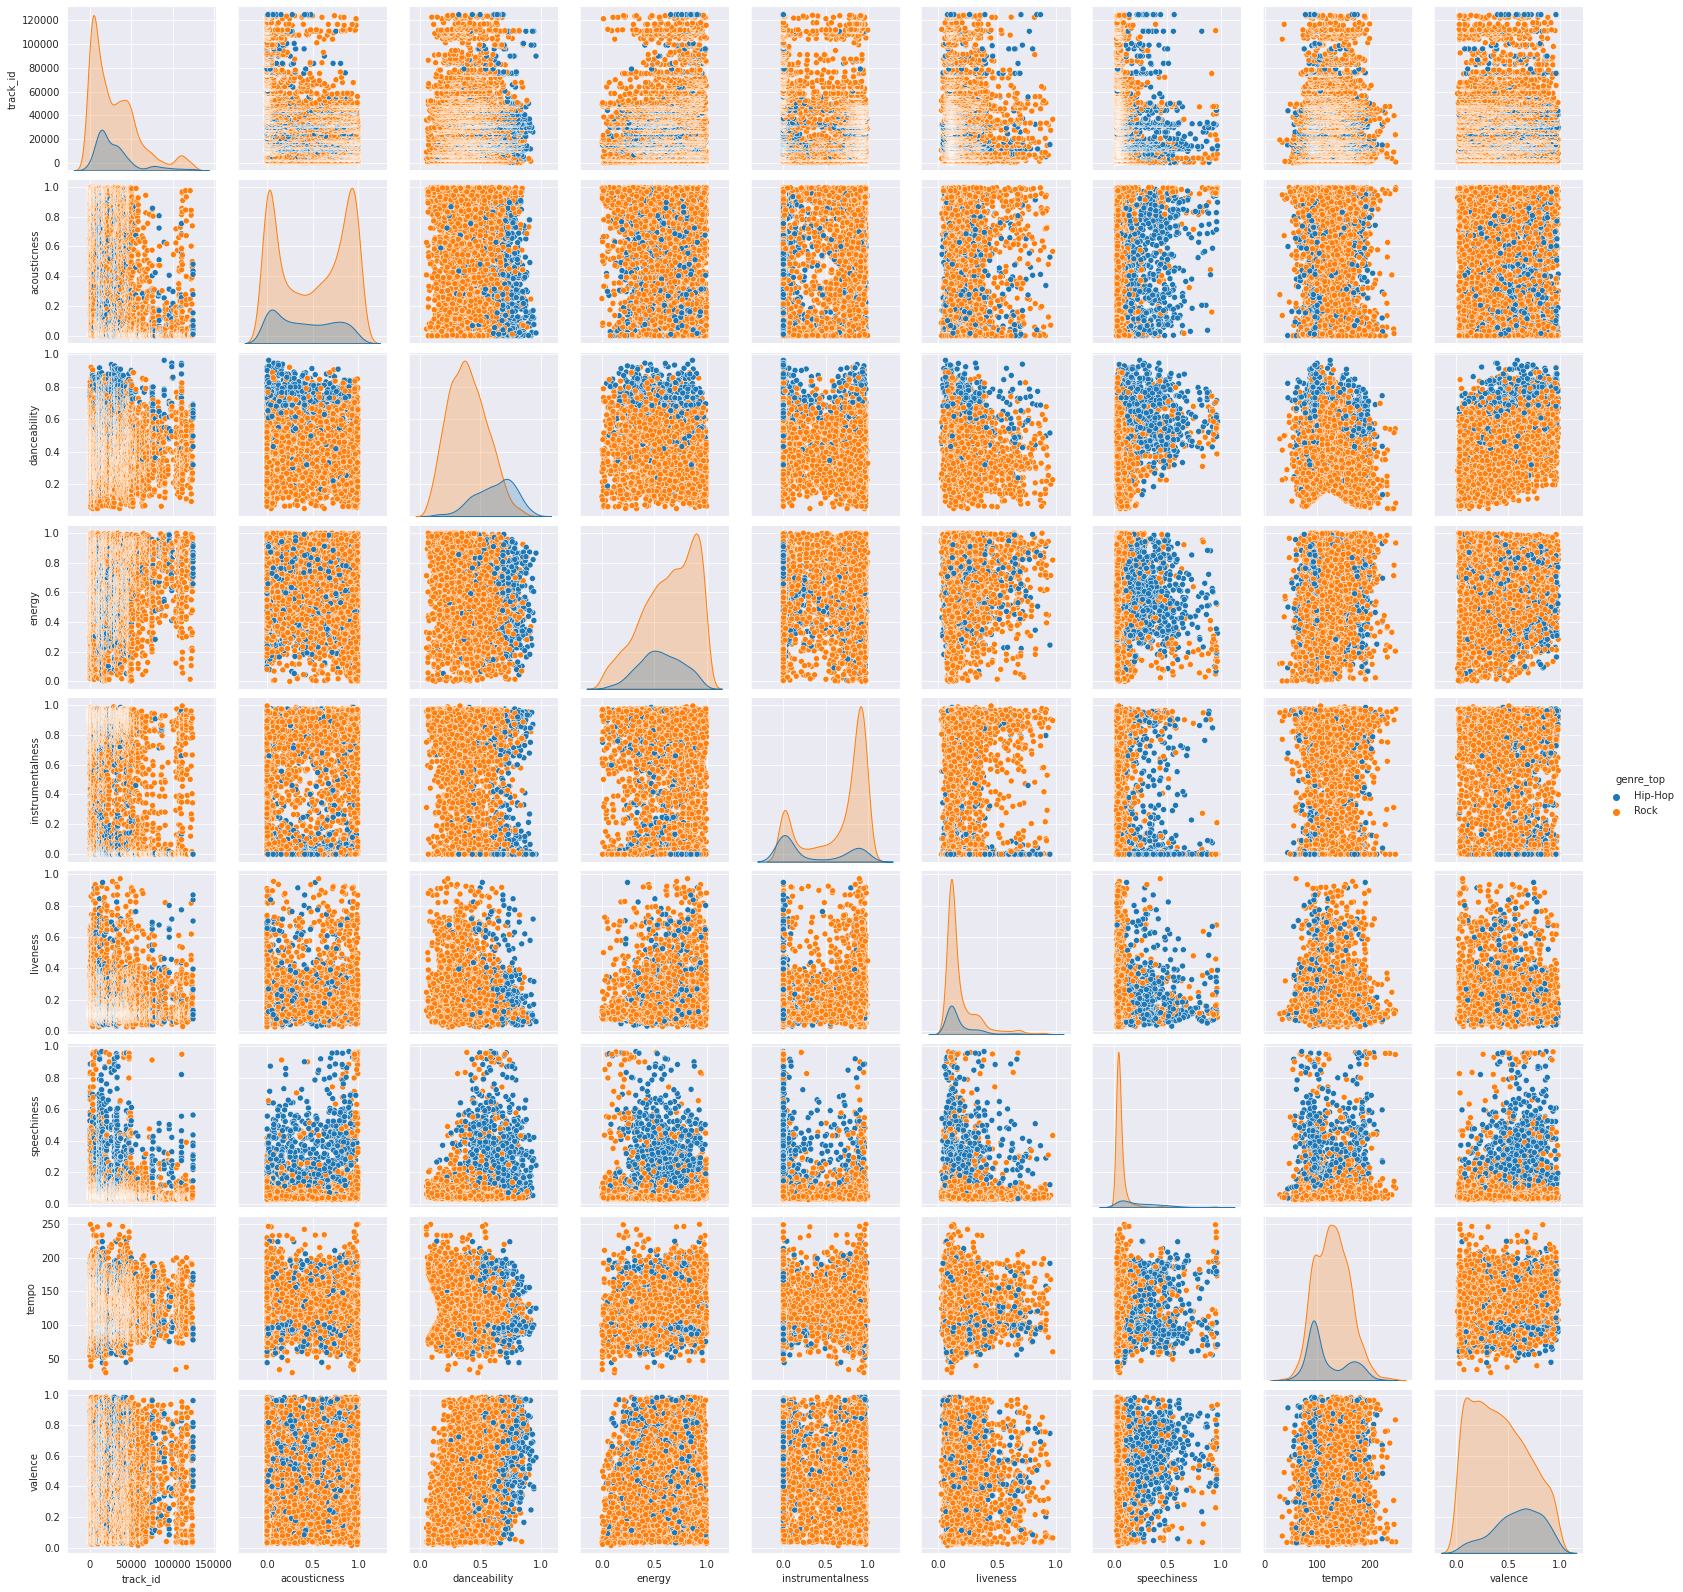

In [35]:
sns.pairplot(new_df,hue='genre_top')

In [25]:
#Splitting into target and data
target=new_df['genre_top']
data=new_df.drop(columns=['track_id','genre_top'])

In [26]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data=sc.fit_transform(data)

In [33]:
data=pd.DataFrame(data)
data

,0,1,2,3,4,5,6,7
0,-0.191210,1.304420,0.038316,-1.576494,-0.068755,0.373034,1.153979,0.462287
1,-0.306036,0.501886,0.788176,-1.599809,-0.545463,2.446155,0.007914,-0.690811
2,-1.204813,1.684139,0.312852,-1.602876,1.229828,0.135130,-0.777317,0.631077
3,-0.094655,0.417927,-0.265203,-1.553079,-0.607326,2.882707,-0.364657,1.652859
4,1.361706,-0.985896,1.453323,0.979975,-0.442757,-0.364157,-1.072003,-1.573102
...,...,...,...,...,...,...,...,...
4797,-0.203384,1.363997,0.918688,-1.604727,4.513867,1.798515,-0.899556,0.896463
4798,-1.173825,0.986358,0.423896,-1.604708,-0.375693,0.947464,-0.894909,-0.201397
4799,-1.294704,1.176828,0.132656,-1.604725,3.411080,0.851822,-0.935410,-0.079418
4800,-1.138691,-0.022534,0.571179,-1.604722,-0.555215,1.409515,1.313013,0.475138


In [34]:
target

0       Hip-Hop
1       Hip-Hop
2       Hip-Hop
3       Hip-Hop
4          Rock
         ...   
4797    Hip-Hop
4798    Hip-Hop
4799    Hip-Hop
4800    Hip-Hop
4801    Hip-Hop
Name: genre_top, Length: 4802, dtype: object

In [36]:
#Splitting into train test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.3)

## Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
dt_gini=DecisionTreeClassifier(max_depth=10,min_samples_leaf=15,random_state=50)

In [39]:
#Train
dt_gini.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=50, splitter='best')

In [40]:
#accuracy scores and such
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [42]:
#train_score
print(accuracy_score(dt_gini.predict(x_train),y_train)*100)
print(classification_report(dt_gini.predict(x_train),y_train))

93.15679857185361
              precision    recall  f1-score   support

     Hip-Hop       0.82      0.82      0.82       649
        Rock       0.96      0.96      0.96      2712

    accuracy                           0.93      3361
   macro avg       0.89      0.89      0.89      3361
weighted avg       0.93      0.93      0.93      3361



In [43]:
#test_scores
print(accuracy_score(dt_gini.predict(x_test),y_test)*100)
print(classification_report(dt_gini.predict(x_test),y_test))

90.9090909090909
              precision    recall  f1-score   support

     Hip-Hop       0.72      0.76      0.74       248
        Rock       0.95      0.94      0.94      1193

    accuracy                           0.91      1441
   macro avg       0.84      0.85      0.84      1441
weighted avg       0.91      0.91      0.91      1441



In [45]:
pd.crosstab(y_test,dt_gini.predict(x_test))

col_0,Hip-Hop,Rock
genre_top,,
Hip-Hop,189,72
Rock,59,1121


In [46]:
print(confusion_matrix(dt_gini.predict(x_test),y_test))

[[ 189   59]
 [  72 1121]]


In [47]:
#plotting the tree
import graphviz
from sklearn import tree


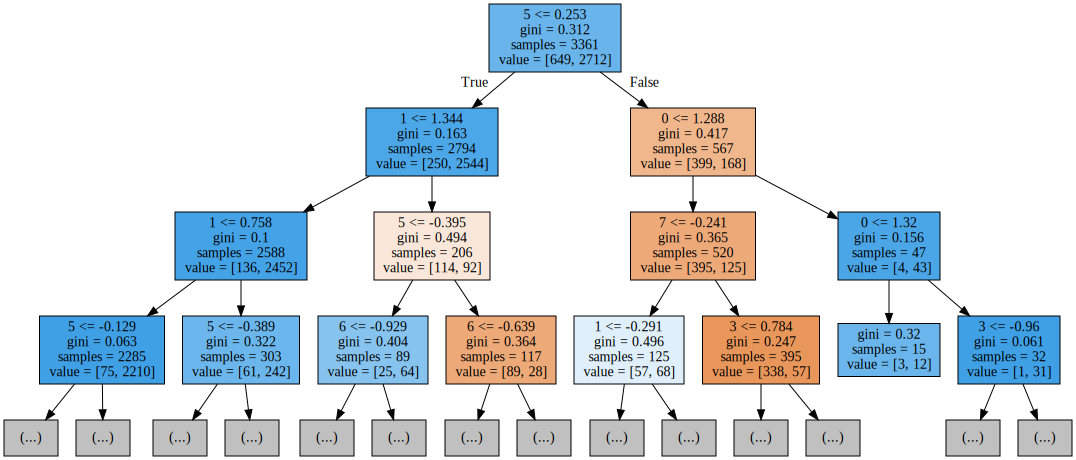

In [51]:
dot_data=tree.export_graphviz(dt_gini,max_depth=3,filled=True,feature_names=data.columns)
graph=graphviz.Source(dot_data)
graph

In [53]:
dt_gini.predict(x_test)[:10]

array(['Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Hip-Hop', 'Rock', 'Rock',
       'Rock', 'Rock'], dtype=object)

In [54]:
pd.DataFrame(dt_gini.predict(x_test)).to_csv("output.csv")